---
>> **2. UŽDUOTIS**
>>
>> [Airbnb duomenys](http://insideairbnb.com/get-the-data.html)
>>
>> Atsisiųskite vieną iš miestų ir atsakykite į klausimus
>>
>> 1. Top 10 savininkų (daugiausiai nuomoja, uždirba)+
>> 2. Kaip dienos kaina kinta jeigu nuomojamasi savaitei/mėnesiui/dienai (listings)? Kadangi tokių duomenų nėra faile, tai pakeičiu klausimą į "Top 10 brangiausių ir pigiausių namų"+
>> 3. Kaip kaina priklauso nuo vietos mieste įvertinimo? Švaros? +
>> 4. Rasti savininkus įvardintus kaip 'superhosts'. Kokią dalį visų
nuomotojų jie sudaro?+
>> 5. Ilgiausias komentaras (reviews_details) +
>> 6. Daugiausiai komentarų turinti vieta. reviews file turi listing_id ir koks komentaras. man reikia, kad kodas suskaiciuotu daugiausiai pasikartojimu turinti skaiciu ir ji grazintu+
>> 7. Iš komentarų datų (reviews) suraskite kada daugiausiai turistų mieste (plot comments vs dates)+
>> 8. Savo klausimą (kokie room types yra dazniausi?)
>> 9. Savo klausimą (kiek hosts turi profile pic?)
>> 10. Savo klausimą (kokie neighbourhoods turi daugiausiai listings?)
>>
>> Portafolio kūrimas.
>>
>> - Patalpinkite kodą į savo github ar gitlab paskyrą (+1 tšk prie kolio)
>>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [221]:
#imports all the relevant files

In [8]:
listings_detailed = pd.DataFrame(pd.read_csv("listings Athens.csv", index_col="id")).fillna(0)
listings_detailed.replace('$', '', inplace= True)
listings= pd.read_csv(r"listings not detailed.csv", index_col='id').fillna(0)
neighbourhoods = pd.DataFrame(pd.read_csv(r"neighbourhoods Atenai.csv").dropna(axis ='columns'))
reviews = pd.read_csv(r"reviews Athens.csv", index_col='id').fillna(0)

In [9]:
#shows the people that have the most homes that are being rented

In [10]:
highest_list_count = listings.sort_values(by='calculated_host_listings_count',ascending=False).drop_duplicates(subset='host_id', keep= 'first').head(10)

In [11]:
#shows the people that have the cheapest or the most expensive homes that are being rented

In [12]:
most_expensive = listings.sort_values(by='price',ascending=False).drop_duplicates(subset='host_id', keep= 'first').head(10)
cheapest = listings.sort_values(by='price',ascending=True).drop_duplicates(subset='host_id', keep= 'first').head(10)

In [13]:
#shows how the price of an appartment changes based on the cleanliness of that part of town

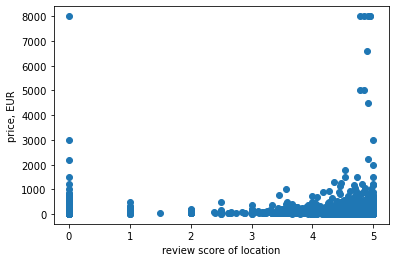

In [14]:
plt.scatter(listings_detailed.review_scores_location, listings.price)
plt.xlabel("review score of location")
plt.ylabel("price, EUR")
plt.show()

In [15]:
#shows how many people are superhosts and who are they

In [16]:
is_superhost = pd.DataFrame(listings_detailed.loc[:, 'host_is_superhost'])
is_superhost.replace(
    to_replace = 't',
    inplace = True,
    value = 1
)
is_superhost.replace(
    to_replace = 'f',
    inplace= True,
    value= 0
)
is_superhost_percentile = is_superhost.sum()/len(is_superhost)*100
superhost_list_A = listings_detailed.sort_values(by='host_is_superhost',ascending=False).drop_duplicates(subset='host_id', keep= 'first')
superhost_list = superhost_list_A.loc[:, [
    'listing_url', 
    'host_id', 
    'room_type', 
    'price'
]] 

In [17]:
#shows the longest comment

In [18]:
length_of_comments = reviews.comments.str.len().sort_values(ascending=False).head(10)
longest_comment_id = length_of_comments.index[0]
longest_comment = reviews.loc[longest_comment_id, 'comments']

In [19]:
#the url of a AirBnB home with the highest number of reviews 

In [20]:
most_reviews_count = reviews['listing_id'].value_counts()
most_reviews_id = most_reviews_count.index[0]
most_reviewed_url = listings_detailed.loc[most_reviews_id, 'listing_url']

In [21]:
#based on the number of reviews, shows how often the place is rented

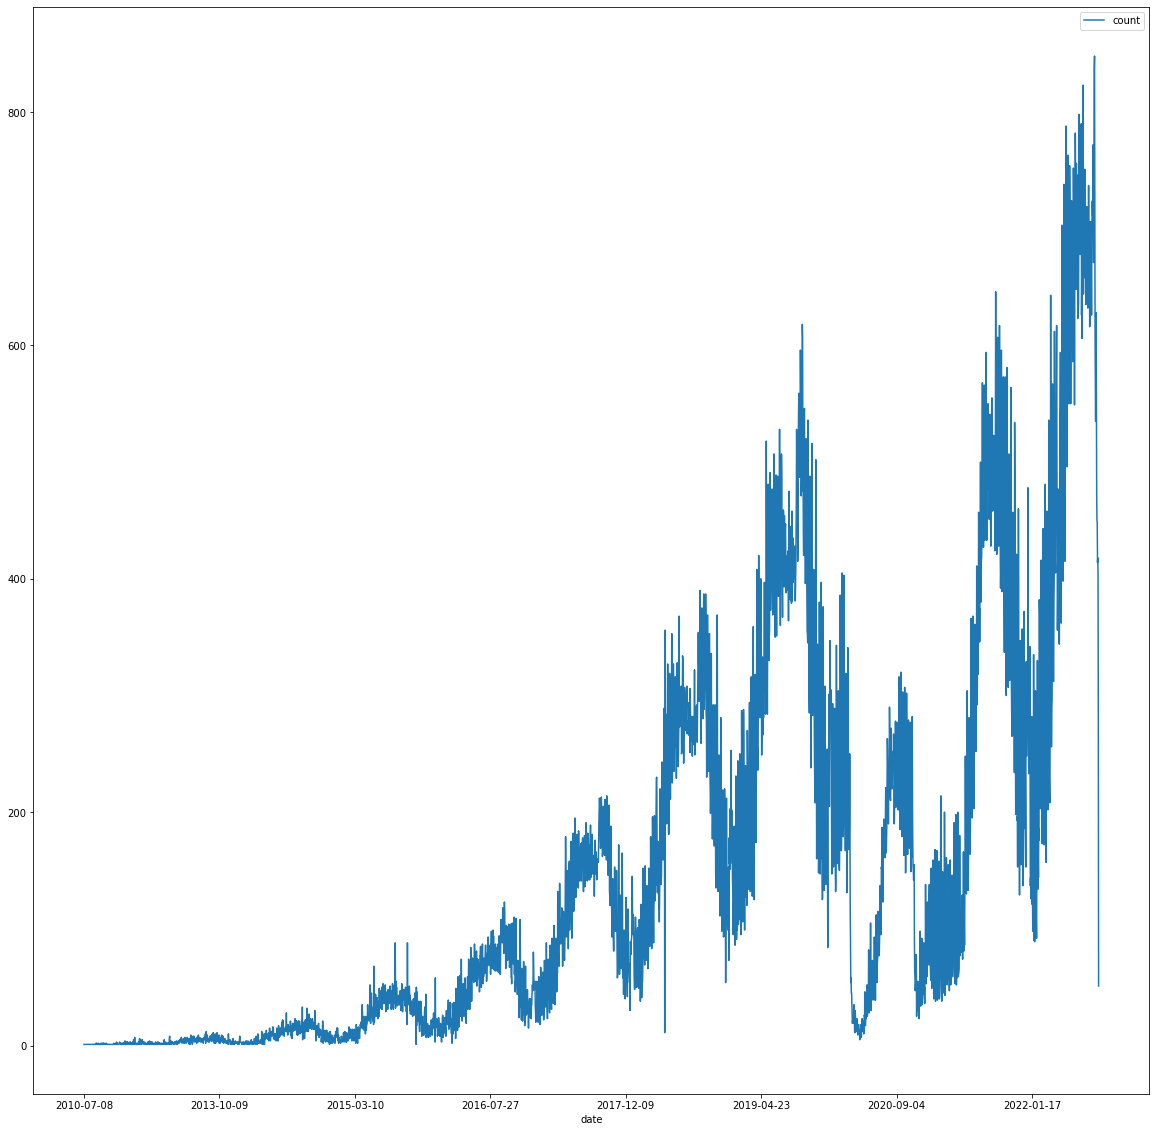

In [22]:
reviews_dates = pd.DataFrame(reviews.loc[:, 'date'])
reviews_dates["count"] = 1
reviews_plot = reviews_dates.groupby("date").sum()
reviews_plot.plot(figsize=(20, 20));

## Does the host have a profile picture, a.k.a., do you want to treat AirBnB as a dating site?

In [23]:
has_profile_pic = pd.DataFrame(listings_detailed.loc[:, 'host_has_profile_pic'])
has_profile_pic.replace(
    to_replace = 't',
    inplace = True,
    value = 1
)
has_profile_pic.replace(
    to_replace = 'f',
    inplace= True,
    value= 0
)
has_profile_pic_percentile = has_profile_pic.sum()/len(has_profile_pic)*100
host_has_profile_pic_list = has_profile_pic.sort_values(by = 'host_has_profile_pic', ascending=False)

# Most listed neighbourhoods

In [24]:
most_listed_neighbourhood = listings_detailed['neighbourhood'].value_counts()[:10].sort_values(ascending=False)

# Most common room type

In [25]:
most_common_room = listings_detailed['room_type'].value_counts()[:10].sort_values(ascending=False)

## Atsakymai

In [26]:
highest_list_count

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
44125968,"85m² homm Apartment, Vatheos str, Ampelokipoi 2BD",29927830,Homm ®,0.0,ΑΜΠΕΛΟΚΗΠΟΙ,37.989070,23.757320,Entire home/apt,50,2,35,2022-08-03,1.34,222,308,11,00001415214
683800272860316826,Spectacular 3BR Apartment in Pangrati,20104194,Upstreet,0.0,ΙΛΙΣΙΑ,37.973022,23.751108,Entire home/apt,139,2,1,2022-09-18,1.00,90,348,1,00001707237
21402471,2Bdrm Apt with pool-Athens Center (3rd floor),748818,George,0.0,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.986900,23.721700,Private room,211,1,1,2021-08-09,0.07,76,365,0,0206K124K0327001
34079249,Museum of Modern Art Private Double Room in sh...,2089542,Tia & Mike,0.0,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.965530,23.725650,Private room,192,1,28,2022-06-04,0.72,65,344,9,00000706660
23442372,Modern 3 Bedroom Apartment w/Wifi & Gym in Pag...,113548208,Mgv,0.0,ΠΑΓΚΡΑΤΙ,37.970630,23.744220,Entire home/apt,263,1,46,2022-08-23,0.84,64,113,4,00000274560
633026694371122347,Modern Living in the Heart of the City 6,90390850,Evan&Anetta,0.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.979359,23.724770,Entire home/apt,68,1,31,2022-09-04,9.49,63,349,31,00001548531
40536919,Athens Raise Acropolis Project 32,29885761,Raise Team,0.0,ΝΕΟΣ ΚΟΣΜΟΣ,37.966320,23.729370,Entire home/apt,65,1,3,2021-06-05,0.10,53,325,0,00000892291
569885907876961061,KL Suites - Ferron,47267002,Tèo,0.0,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.991790,23.728360,Entire home/apt,100,3,4,2022-09-12,1.36,44,361,4,00000595390
4087770,Penthouse. Private Balcony. Great Views!,1418201,D & Y Boutique Athens,0.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.979340,23.727600,Entire home/apt,113,3,21,2020-10-06,0.22,44,320,0,Exempt


In [27]:
most_expensive

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
29363635,Athens center Family or company Double apartment,145112138,Ilias,0.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.985830,23.732320,Hotel room,8000,1,2,2019-07-25,0.05,4,337,0,1064022
44987413,St Bjur. Triple Room,331327165,Markos,0.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.977070,23.725220,Private room,8000,1,0,0,0.00,9,290,0,0
21106510,Deluxe Family Suites,151495413,Soktatis,0.0,ΣΤΑΔΙΟ,37.969090,23.740200,Private room,8000,1,0,0,0.00,3,250,0,0
26220165,"Smart double room 3 Next to metro/tram, Acropolis",2089542,Tia & Mike,0.0,ΝΕΟΣ ΚΟΣΜΟΣ,37.964010,23.728720,Private room,6586,2,29,2021-11-28,0.56,65,365,1,00000191616
17763728,Spectacular Acropolis view in residential comfort,91802743,Nikos,0.0,ΝΕΟΣ ΚΟΣΜΟΣ,37.960930,23.724600,Entire home/apt,5000,1,1,2018-08-17,0.02,1,0,0,00000278509
14757686,Petralona Athens centre,72720508,Ioannis,0.0,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,2020-11-24,0.75,1,0,0,(ΑΜΑ) 00000210572
9916154,Marie Christine Suite,50987302,Yiannis,0.0,ΛΥΚΑΒΗΤΤΟΣ,37.980420,23.742860,Private room,4500,1,0,0,0.00,2,363,0,ΜΗΤΕ 0206Κ015Α0000200
34568658,ATHENS STUDIO NEAR CENTER AND ACROPOLIS.ZOGRAFOU.,260828371,Christos,0.0,ΓΟΥΔΙ,37.977460,23.772000,Entire home/apt,3000,4,6,2019-12-06,0.16,2,362,0,00000787709
53021518,SMART cozy studio apartment 30 sq.m at Athens,427327229,Christos,0.0,ΑΝΩ ΚΥΨΕΛΗ,38.004500,23.736500,Entire home/apt,3000,1,16,2022-08-16,1.54,2,357,16,00001365645


In [28]:
cheapest

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
30499377,Room in Historical flat - magnificent apartment,180724995,Co And Living,0.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98681,23.73706,Private room,10,25,1,2019-09-15,0.03,18,14,0,0
40584033,Bauhaus room in avant guard apartment!,58007861,Costas,0.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98503,23.74103,Private room,10,60,0,0,0.00,3,14,0,0
25334566,Athens private room in apartment with yard (gr...,59376128,Vaki,0.0,ΝΕΟΣ ΚΟΣΜΟΣ,37.95656,23.73644,Private room,11,30,38,2022-08-03,0.72,6,84,3,00000210663
560070645134978455,Nettes Zimmer,40921063,Gerhard,0.0,ΠΑΤΗΣΙΑ,38.01511,23.73798,Private room,11,3,0,0,0.00,25,56,0,00001427870
649349457726860852,Living room in a shared apartment Kato Pstisia.,433341509,Rusanda,0.0,ΠΑΤΗΣΙΑ,38.01086,23.73315,Private room,12,1,1,2022-07-05,0.38,4,341,1,00000829955
17695435,Vintage Apartment near city center,83778001,Dimitris,0.0,ΚΥΨΕΛΗ,37.99777,23.73508,Entire home/apt,12,15,29,2022-04-01,0.46,1,46,4,00000170877
32389059,kallithea flat,132858585,Motong,0.0,ΠΕΤΡΑΛΩΝΑ,37.95261,23.69524,Private room,12,1,25,2022-07-25,0.57,8,34,13,0
48588874,Λ.Small sheared furnished room in a penthouse,391174500,Elena,0.0,ΣΕΠΟΛΙΑ,38.01563,23.69764,Private room,12,7,0,0,0.00,4,134,0,0
7215898,Cosy bedroom near Acropolis,16712997,Jordi,0.0,ΝΕΟΣ ΚΟΣΜΟΣ,37.96083,23.73167,Private room,12,1,621,2022-09-19,7.08,1,312,51,0


In [29]:
is_superhost_percentile

host_is_superhost    35.725442
dtype: float64

In [30]:
superhost_list

,listing_url,host_id,room_type,price
id,,,,
50141952,https://www.airbnb.com/rooms/50141952,1418201,Entire home/apt,$54.00
53139542,https://www.airbnb.com/rooms/53139542,248409239,Entire home/apt,$282.00
27321776,https://www.airbnb.com/rooms/27321776,204422351,Entire home/apt,$33.00
27318970,https://www.airbnb.com/rooms/27318970,31290848,Entire home/apt,$50.00
53158964,https://www.airbnb.com/rooms/53158964,70297345,Entire home/apt,$37.00
...,...,...,...,...
35560032,https://www.airbnb.com/rooms/35560032,267540507,Entire home/apt,$45.00
35475215,https://www.airbnb.com/rooms/35475215,266896820,Entire home/apt,$146.00
35402643,https://www.airbnb.com/rooms/35402643,264545063,Entire home/apt,$35.00


In [31]:
longest_comment

'*****BEST PLACE TO BE! *****<br/><br/>John is the best host with his beautiful  and confortable apartment located in the best location in the heart of central Athens. <br/>Trust me : If there is a place that combines all the qualities sought by a first class host this is it !!<br/><br/>I was so satisfied with the quality of the place, its location and its host that I will keep this one for my next visit to central Athens.<br/><br/>The photos on Aibnb are not enough relevant of the quality of the accomodation and the location so here is the description and the report from me:<br/><br/>First of all, the apartment is located in the very heart of the center around the lovely and charming "Plaka" district of Athens. the "Acropolis" metro station is right in front! .<br/><br/>A good advice:  Before  booking your place in Athens center area, take your time to be sure, because many host claim to be in the center and are only in the surroundings in often dirty, overcrowded areas that do not in

In [32]:
most_reviewed_url

'https://www.airbnb.com/rooms/1177492'

In [33]:
host_has_profile_pic_list

,host_has_profile_pic
id,
42384166,1
51633989,1
51591447,1
51593684,1
51596740,1
...,...
646306315531574089,0
631732636303573816,0
631830299373247043,0


In [34]:
has_profile_pic_percentile

host_has_profile_pic    98.808056
dtype: float64

In [35]:
most_listed_neighbourhood

Athina, Greece            6197
0                         4404
Athens, Greece             290
Athens, Attica, Greece     211
Kallithea, Greece          150
Nea Smirni, Greece          83
Zografou, Greece            78
Αθήνα, Greece               46
Kesariani, Greece           41
Vironas, Greece             37
Name: neighbourhood, dtype: int64

In [36]:
most_common_room

Entire home/apt    10831
Private room        1125
Hotel room           140
Shared room           69
Name: room_type, dtype: int64